Import Libraries

In [1]:
from dtocs import *
from helper import *
from maps import *
import numpy as np
import matplotlib.pyplot as plt

Boundary Box

In [19]:
lon1,lat1 = -109.83007049344715, 44.36470033197011
lon2,lat2 = -109.7513685303535, 44.29673563882564
# lon1,lat1 = 77.28112208857522, 32.135432817449384
# lon2,lat2 = 77.62169826045022, 31.94918029751246

resolution = 30

Elevation Matrix

In [20]:
elevation_map, landcover_map = getGrayLevelMatrix(lon1,lat1,lon2,lat2,resolution)

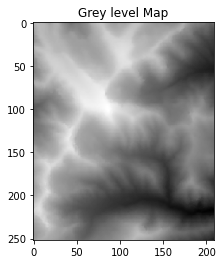

In [21]:
plt.imshow(elevation_map,cmap='gray')
plt.title('Grey level Map')
plt.show()

In [22]:
print("Elevation Map Info")
print(f"Gray Map Shape: {elevation_map.shape}")
print(f"Min: {elevation_map.min()}")
print(f"Max: {elevation_map.max()}")

Elevation Map Info
Gray Map Shape: (252, 209)
Min: 2411
Max: 3670


No handles with labels found to put in legend.


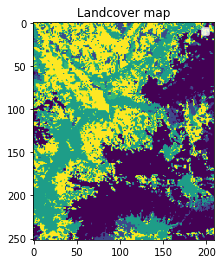

In [23]:
plt.imshow(landcover_map)
plt.title('Landcover map')
plt.legend()
plt.show()

<AxesSubplot:>

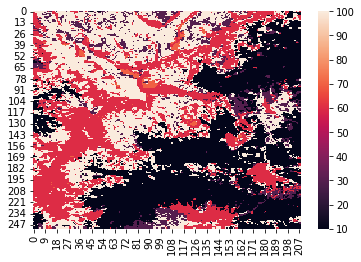

In [11]:
import seaborn as sns
sns.heatmap(landcover_map)

Source and Destination

In [24]:
n,m = elevation_map.shape

src_lon,src_lat = -109.81884898177093,44.32480359458633
des_lon,des_lat = -109.77537406272984,44.30294042398075

src_latIdx,src_lonIdx = findIndex(src_lat,src_lon, lat1,lon1, lat2,lon2, resolution)
des_latIdx,des_lonIdx = findIndex(des_lat,des_lon, lat1,lon1, lat2,lon2, resolution)

Two Binary Maps: Source and Destination

In [25]:
bin_map_start = initBinMap(src_latIdx, src_lonIdx, n, m)   
bin_map_end = initBinMap(des_latIdx, des_lonIdx, n, m)

Distance Transform till convergence

In [26]:
accuracy = 0.0000001
alpha=0
# applyDistTf(elevation_map, bin_map_start, bin_map_end, accuracy)
applyDistTfWithLC(elevation_map, landcover_map, bin_map_start, bin_map_end, accuracy, alpha)


Applying Distance transform......
Number of Passes for convergence: 33
Number of Passes for convergence: 28
Done!


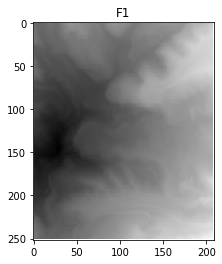

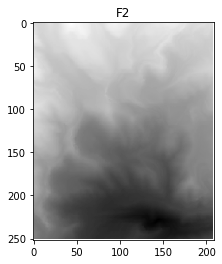

In [27]:
plt.imshow(bin_map_start,cmap='gray')
plt.title("F1")
plt.show()

plt.imshow(bin_map_end,cmap='gray')
plt.title("F2")
plt.show()

Single Source Distance Transform

In [16]:
accuracy = 0.0001
alpha = 1
parentMat = applyDistTfSingleSource(elevation_map, landcover_map, bin_map_start, accuracy, alpha)

Applying Distance transform......
Number of Passes for convergence: 28
Done!


Results

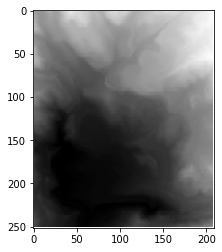

In [28]:
combined_bin_map = combineBinmap(bin_map_start, bin_map_end)
plt.imshow(combined_bin_map, cmap='gray')
plt.show()

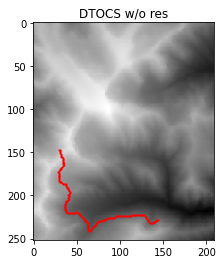

In [29]:
showPathDTf(elevation_map, np.array(combined_bin_map))

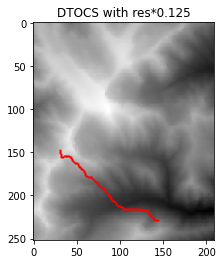

In [17]:
showPathDTCOS(elevation_map, parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx)